# 📖  Lexical Semantics: The Foundation of Natural Language Processing

## Introduction

In this notebook, we explore the **theoretical foundations of lexical semantics**, a core area that underpins **text mining** and **natural language processing (NLP)**.  
It's fascinating to observe how NLP is deeply rooted in linguistics! 
Let's explore these fundamental concepts that drive modern text analysis techniques.


## Core Concepts in Lexical Semantics

### 📖 What is Lexical Semantics?

**Lexical semantics** is a branch of linguistics that focuses on understanding **the meaning of words**.  
It provides the theoretical basis for many real-world NLP applications, including:

- Search Engines
- Recommendation Systems
- Sentiment Analysis
- Machine Translation

In [1]:
# Libraries we'll use throughout this notebook
import nltk
import spacy
import gensim
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load spaCy model for English
nlp = spacy.load("en_core_web_sm")

### 📖 Lemmas and Word Senses

A **lemma** (or citation form) is the canonical form of a word.  
For example:

- **"mouse"** is the lemma for both _"mouse"_ and _"mice"_
- **"sing"** is the lemma for _"sing"_, _"sang"_, _"sung"_
- **"dormir"** (to sleep) in Spanish is the lemma for _"duermes"_ (you sleep)

---

Many lemmas have multiple meanings, which leads to the concept of **polysemy**.

#### 🔎 Example: The Lemma "Mouse"

The lemma **"mouse"** can refer to:

1. A small rodent
2. A hand-operated device that controls a computer cursor

In [2]:
# Example: Finding lemmas using spaCy
text = "The mice were running around while I clicked my mouse to browse websites."
doc = nlp(text)

for token in doc:
    print(f"Word: {token.text}, Lemma: {token.lemma_}")

Word: The, Lemma: the
Word: mice, Lemma: mouse
Word: were, Lemma: be
Word: running, Lemma: run
Word: around, Lemma: around
Word: while, Lemma: while
Word: I, Lemma: I
Word: clicked, Lemma: click
Word: my, Lemma: my
Word: mouse, Lemma: mouse
Word: to, Lemma: to
Word: browse, Lemma: browse
Word: websites, Lemma: website
Word: ., Lemma: .


---

### ⚡ Challenges in NLP

Polysemy can cause significant challenges in natural language processing.  
When a single lemma has multiple meanings, it can confuse models trying to understand the intended sense in context.

**Example:**  
- In the sentence _"The mouse chewed through the cable,"_ "mouse" likely refers to the animal.
- In _"I bought a new mouse for my laptop,"_ "mouse" refers to a computer device.

Models must learn to **disambiguate** the correct meaning based on context — a complex and essential task for accurate text analysis!

**Word sense disambiguation** is the computational task of determining which sense of a word is being used in a particular context. This is crucial for accurate machine translation, information retrieval, and content analysis.


---

### 📖 Word Sense Disambiguation (WSD)

**Word sense disambiguation** is the computational task of determining **which sense** of a word is being used in a particular context.  
This process is crucial for:

- Accurate machine translation
- Effective information retrieval
- Reliable content analysis

Without proper disambiguation, NLP systems might misunderstand or misinterpret texts, leading to errors in downstream applications.

---


### 💡 Fun Fact: A Historic Challenge in Computational Linguistics

Word Sense Disambiguation (WSD) has been recognized as one of the most persistent challenges in computational linguistics **since the early days of computing in the 1950s**!

Early pioneers quickly discovered that teaching computers to understand contextual meaning was far more complex than anticipated. While humans effortlessly determine whether "bank" refers to a financial institution or a riverside in different contexts, creating algorithms to make these distinctions proved remarkably difficult.

What makes WSD particularly fascinating is its status as an "AI-complete" problem—one that essentially requires human-level intelligence to fully solve. Despite over 70 years of research and significant advances in NLP and deep learning, WSD remains an active area of research with ongoing challenges, especially for:

- Highly polysemous words (words with many potential meanings)
- Idiomatic expressions and figurative language
- Domain-specific terminology
- Low-resource languages

The evolution of WSD approaches reflects the broader history of AI itself—from early rule-based systems to statistical methods, and now to neural networks and transformer architectures that have dramatically improved performance, though still falling short of human-level understanding.

Next time you use a search engine, machine translation tool, or voice assistant that correctly interprets an ambiguous word, appreciate the decades of research that made that small act of "understanding" possible!

---

### 💻 A Simple Rule-Based Approach to Word Sense Disambiguation

This code demonstrates a simple rule-based approach to **word sense disambiguation (WSD)** for the word **"mouse"**, which, as we saw, has two common meanings: the small rodent (animal) or the computer input device


⚙️ The function uses a **context-based scoring system**:

- Defines two lists of context words associated with each sense
- Counts how many context words from each category appear in the sentence
- Assigns the meaning with the highest context score


> 💡 **Note:**  
> While simplistic, this example illustrates the **core concept** behind many WSD approaches:  
> **Using surrounding context to determine word meaning.**

In [3]:
# Simple rule-based word sense disambiguation for "mouse"
def simple_mouse_disambiguation(sentence):
    computer_terms = ["click", "cursor", "computer", "screen", "keyboard"]
    animal_terms = ["cat", "rodent", "trap", "cheese", "pet"]
    
    sentence = sentence.lower()
    
    # Count context clues
    computer_score = sum(1 for term in computer_terms if term in sentence)
    animal_score = sum(1 for term in animal_terms if term in sentence)
    
    if computer_score > animal_score:
        return "COMPUTER_DEVICE"
    elif animal_score > computer_score:
        return "ANIMAL"
    else:
        return "UNKNOWN"

# Test cases
print(simple_mouse_disambiguation("I need a new mouse because my cursor keeps freezing"))
print(simple_mouse_disambiguation("The cat chased the mouse around the kitchen"))

COMPUTER_DEVICE
ANIMAL


❗ Even though this method is very simple, it shows the basic idea:
Use context to predict meaning.
In real-world NLP, more advanced techniques like machine learning and deep learning are used for better performance!

---

### 📖 Word Relationships

---

#### 📖 Synonymy

**Synonymy** refers to words with **identical or very similar meanings**.  
Perfect synonyms would be completely interchangeable without changing the **truth conditions** of a sentence.


**Examples of synonym pairs:**

- couch / sofa
- car / automobile
- vomit / throw up
- filbert / hazelnut

---

### 💻 Finding Synonyms with WordNet

This code shows how to use NLTK's WordNet interface to find synonyms for English words. WordNet is a large lexical database that groups words into sets of cognitive synonyms (synsets), each expressing a distinct concept.

### ⚙️ How It Works

The function `get_synonyms()` retrieves all possible synonyms for a given word by:

1. Accessing all possible synsets (synonym sets) containing the word
2. Extracting all lemmas (word forms) from each synset
3. Returning a deduplicated set of these synonyms

In [4]:
# Using WordNet to find synonyms
from nltk.corpus import wordnet

nltk.download('wordnet')

def get_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return set(synonyms)  # Remove duplicates

print("Synonyms of 'car':", get_synonyms("car"))
print("Synonyms of 'happy':", get_synonyms("happy"))

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/stellaandorno/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Synonyms of 'car': {'railcar', 'railroad_car', 'car', 'elevator_car', 'machine', 'railway_car', 'gondola', 'cable_car', 'auto', 'automobile', 'motorcar'}
Synonyms of 'happy': {'happy', 'well-chosen', 'felicitous', 'glad'}


This approach demonstrates how lexical resources like WordNet can help NLP applications identify semantically equivalent terms, which is useful for tasks like query expansion in search engines, text enrichment, or building thesaurus-like functionality.

❗ 
This is a basic synonym finder. It retrieves all possible synonyms, regardless of context!
In real-world NLP, more advanced methods are needed to pick the correct synonym depending on meaning.

**The Principle of Contrast** (Girard 1718, Bréal 1897, Clark 1987) argues that no two words are exactly synonymous - differences in form always signal some difference in meaning. For example, while "water" and "H₂O" refer to the same substance, they differ in usage contexts. "H₂O" is appropriate in scientific contexts, while "water" is more suitable in everyday situations.

#### Word Similarity vs. Relatedness

**Word similarity** measures how alike two words are in meaning. For example, "cat" and "dog" are quite similar as they're both common household pets, even though they're different animals.

**Word relatedness** captures a broader relationship between words that may not be similar but commonly appear in the same contexts. For example, "coffee" and "cup" aren't similar (one is a beverage, the other is a container), but they're strongly related through usage.


---

### 📖 The Principle of Contrast

**The Principle of Contrast** (Girard 1718, Bréal 1897, Clark 1987) argues that **no two words are exactly synonymous** — differences in form always signal some difference in meaning.  
For example, while **"water"** and **"H₂O"** refer to the same substance, they differ in usage contexts:  

- **"H₂O"** is appropriate in scientific contexts
- **"water"** is more suitable in everyday situations.

---

### 📖 Word Similarity vs. Relatedness
--- 

#### 📖 Word Similarity

**Word similarity** measures how alike two words are in meaning.  
For example, **"cat"** and **"dog"** are quite similar as they're both common household pets, even though they're different animals.

#### 📖 Word Relatedness

**Word relatedness** captures a broader relationship between words that may not be similar but commonly appear in the same contexts.  
For example, **"coffee"** and **"cup"** aren't similar (one is a beverage, the other is a container), but they're strongly related through usage.

---
### 💻 Code Section - Word Similarity and Relatedness with Word Vectors

This code demonstrates how to use **pre-trained word embeddings** to explore semantic relationships between words.  
It uses **GloVe vectors** (Global Vectors for Word Representation) to quantify similarities between both **conceptually similar words** and **functionally related words**.


### ⚙️ How It Works

The code leverages **Gensim's API** to:

1. Load pre-trained GloVe word vectors trained on Wikipedia and Gigaword corpus
2. Compare similarity scores between different types of word pairs
3. Find the most semantically similar words to a given target word

---



In [5]:
# Demonstrating word similarity vs. relatedness using word vectors
import gensim.downloader as api

# Load pre-trained word vectors
word_vectors = api.load('glove-wiki-gigaword-100')

# Similarity between similar words
print("Similarity between 'cat' and 'dog':", 
      word_vectors.similarity('cat', 'dog'))

# Similarity between related but not similar words
print("Similarity between 'coffee' and 'cup':", 
      word_vectors.similarity('coffee', 'cup'))

# Finding most similar words
print("Words most similar to 'doctor':")
for word, score in word_vectors.most_similar('doctor', topn=5):
    print(f"  {word}: {score:.4f}")

Similarity between 'cat' and 'dog': 0.87980753
Similarity between 'coffee' and 'cup': 0.33575124
Words most similar to 'doctor':
  physician: 0.7673
  nurse: 0.7522
  dr.: 0.7175
  doctors: 0.7081
  patient: 0.7074



--- 

#### 🔍 Deepening the Concept

This example illustrates how distributional semantics captures both:
- Similarity: Words of the same type (e.g., cat/dog)
- Relatedness: Words that frequently co-occur in similar contexts (e.g., coffee/cup)

The similarity scores reflect how close words are in the high-dimensional vector space, where proximity indicates semantic association.


#### 🌍 Real-World Application

Word vectors like these form the foundation for many modern NLP applications by turning words into mathematical objects that algorithms can process to understand meaning.

---

---

### 📖 Semantic Fields and Topic Models

A **semantic field** is a set of words related to a **common domain or concept**.  
Words in the same semantic field are often related by **context** rather than **synonymy**.

---

### 🔍 Examples of Semantic Fields

- Hospital field: surgeon, scalpel, nurse, anesthetic, hospital
- Restaurant field: waiter, menu, plate, food, chef
- House field: door, roof, kitchen, family, bed

---

### 📖 Topic Models

**Topic models** like **Latent Dirichlet Allocation (LDA)** use **unsupervised learning** to discover these **semantic fields automatically** from text.

In [6]:
# Simple topic modeling with LDA
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Sample documents representing different topics
documents = [
    "The doctor performed surgery using a scalpel in the hospital",
    "The nurse administered medication to patients in the ward",
    "The waiter brought menus to the table at the restaurant",
    "The chef prepared a delicious meal in the kitchen",
    "The family relaxed in the living room of their house",
    "The roof of the house needed repairs after the storm"
]

# Preprocess documents
processed_docs = [[word.lower() for word in doc.split() if len(word) > 3] 
                 for doc in documents]

# Create dictionary and corpus
dictionary = Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train LDA model
lda_model = LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    passes=10
)

# Display topics
for topic_id, topic in lda_model.print_topics():
    print(f"Topic {topic_id}: {topic}")

Topic 0: 0.080*"scalpel" + 0.080*"performed" + 0.080*"hospital" + 0.080*"surgery" + 0.080*"using" + 0.080*"doctor" + 0.020*"room" + 0.020*"their" + 0.020*"living" + 0.020*"relaxed"
Topic 1: 0.085*"brought" + 0.085*"restaurant" + 0.085*"waiter" + 0.085*"table" + 0.085*"menus" + 0.022*"administered" + 0.021*"nurse" + 0.021*"ward" + 0.021*"medication" + 0.021*"patients"
Topic 2: 0.071*"house" + 0.041*"roof" + 0.041*"needed" + 0.041*"repairs" + 0.041*"storm" + 0.041*"after" + 0.041*"family" + 0.041*"kitchen" + 0.041*"meal" + 0.041*"delicious"


---

### 📖 Semantic Frames and Roles

A **semantic frame** represents a set of words that denote **perspectives or participants** in a particular type of event.  
Different words can describe the **same event** from different perspectives.

---

#### 🔍 Example: Commercial Transaction Frame

- Buyer perspective: "Sam bought a book from Ling"
- Seller perspective: "Ling sold a book to Sam"
- Focus on money: "Sam paid Ling for a book"

---

### 📖 Semantic Roles

Semantic frames contain **semantic roles** (like **buyer**, **seller**, **goods**, **money**), and words in a sentence **fill these roles**.

In [7]:
# Simple semantic role analyzer for buying/selling events
def analyze_transaction(sentence):
    # Parse the input sentence with the NLP pipeline (e.g., SpaCy)
    doc = nlp(sentence)
    
    # Initialize an empty “frame” with slots for the event type and the three roles
    frame = {
        "event":  None,   # Will hold "purchase" or "sale"
        "buyer":  None,   # Who is buying
        "seller": None,   # Who is selling
        "goods":  None    # What is being transacted
    }
    
    # Loop over every token in the parsed sentence
    for token in doc:
        # If we find a form of the verb “buy”...
        if token.lemma_ == "buy":
            frame["event"] = "purchase"
            
            # Inspect all children of this verb in the dependency tree
            for child in token.head.children:
                # Nominal subject → typically the buyer
                if child.dep_ == "nsubj":
                    frame["buyer"] = child.text
                # Direct object → typically the goods
                elif child.dep_ == "dobj":
                    frame["goods"] = child.text
                # A “from” preposition → the seller will be its object
                elif child.dep_ == "prep" and child.text == "from":
                    for seller in child.children:
                        if seller.dep_ == "pobj":
                            frame["seller"] = seller.text
        
        # If we find a form of the verb “sell”...
        elif token.lemma_ == "sell":
            frame["event"] = "sale"
            
            # Again, look at the verb’s dependency children
            for child in token.head.children:
                # Nominal subject → typically the seller
                if child.dep_ == "nsubj":
                    frame["seller"] = child.text
                # Direct object → typically the goods
                elif child.dep_ == "dobj":
                    frame["goods"] = child.text
                # A “to” preposition → the buyer will be its object
                elif child.dep_ == "prep" and child.text == "to":
                    for buyer in child.children:
                        if buyer.dep_ == "pobj":
                            frame["buyer"] = buyer.text
    
    # Return the filled‐in semantic frame
    return frame

# Test the function with two equivalent perspectives:
#  - “Sam bought a book from Ling” (buyer‐focused)
#  - “Ling sold a book to Sam” (seller‐focused)
print(analyze_transaction("Sam bought a book from Ling"))
print(analyze_transaction("Ling sold a book to Sam"))

{'event': 'purchase', 'buyer': 'Sam', 'seller': 'Ling', 'goods': 'book'}
{'event': 'sale', 'buyer': 'Sam', 'seller': 'Ling', 'goods': 'book'}


---

### 📖 Connotation and Sentiment

**Connotation** refers to the **emotional or evaluative meaning** associated with a word, beyond its literal definition.  
Words carry **positive**, **negative**, or **neutral connotations** that impact how a message is received.

---

### 🔍 Example Contrasts

- Positive vs. Negative: "curious" (positive) vs. "nosy" (negative)  
- Formal vs. Informal: "residence" (formal) vs. "pad" (informal)
- Technical vs. Everyday: "H₂O" (technical) vs. "water" (everyday)

---

### 📖 Dimensions of Connotation (Osgood et al., 1957)

According to early work by **Osgood et al. (1957)**, words vary along three dimensions:

1. **Valence**: the pleasantness of the stimulus (happy → high, sad → low)
2. **Arousal**: the intensity of emotion provoked (excited → high, calm → low)
3. **Dominance**: the degree of control exerted (controlling → high, influenced → low)

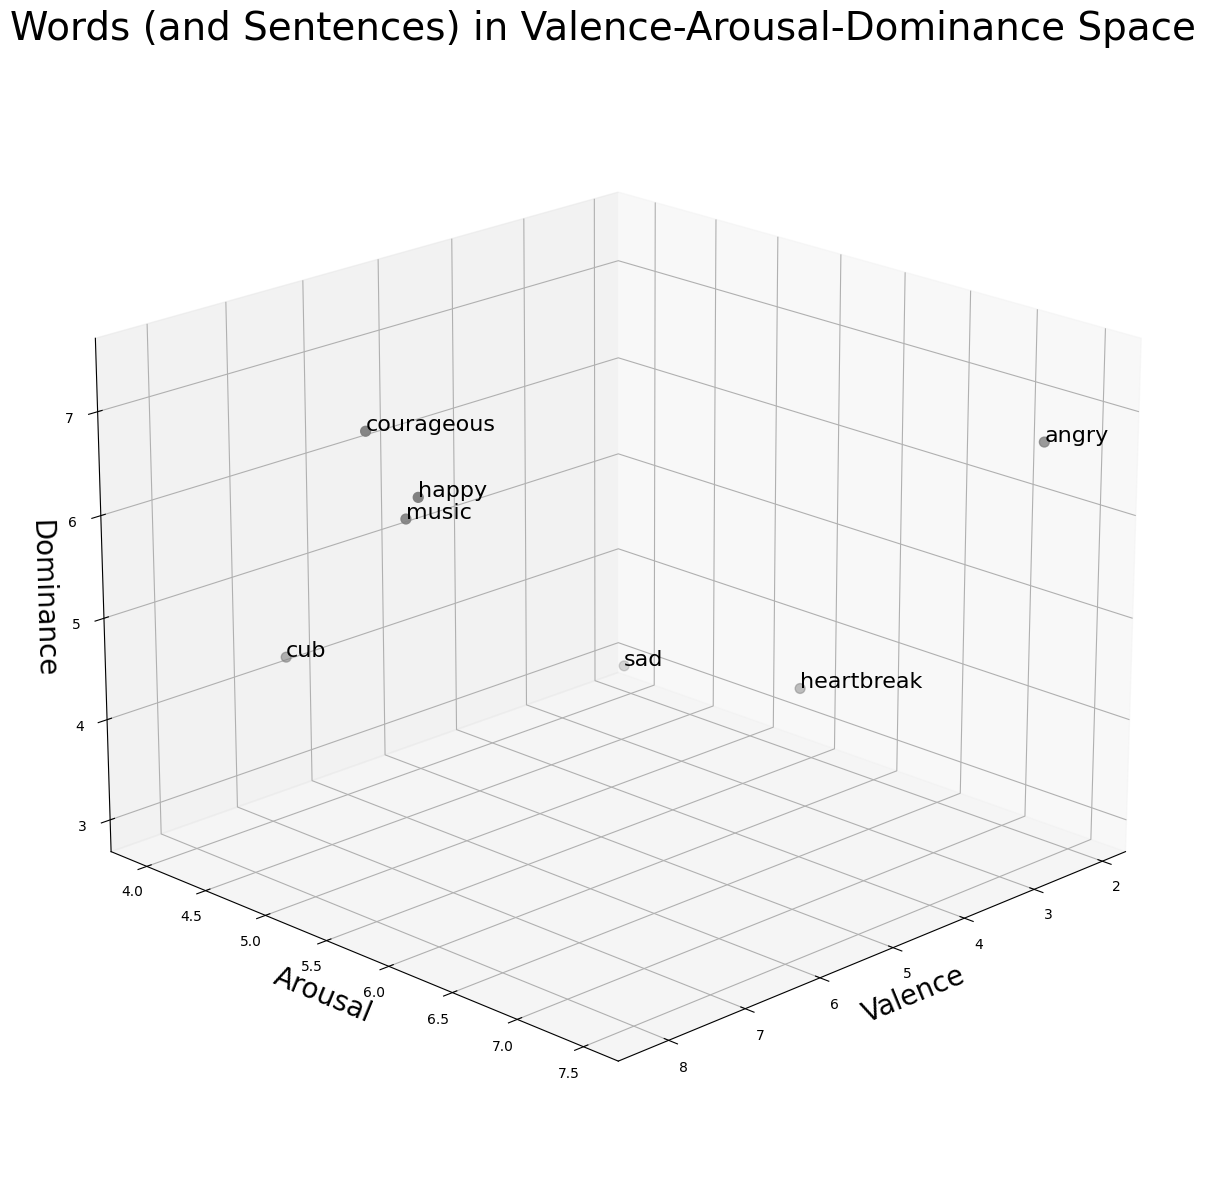

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Updated data including the savage sentence as a separate key
vad_words = {
    'courageous': [8.05, 5.5, 7.38],
    'music': [7.67, 5.57, 6.5],
    'heartbreak': [2.45, 5.65, 3.58],
    'cub': [6.71, 3.95, 4.24],
    'happy': [8.2, 6.0, 7.0],
    'sad': [2.1, 4.0, 3.0],
    'angry': [2.5, 7.5, 6.8],  # Hypothetical values
}

# Create DataFrame
vad_df = pd.DataFrame.from_dict(vad_words, orient='index', 
                                columns=['Valence', 'Arousal', 'Dominance'])

# Plot in 3D with highlighting
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111, projection='3d')

# Define color and size per point
colors = ['gray' for word in vad_df.index]
sizes  = [50 for word in vad_df.index]

ax.scatter(vad_df['Valence'], vad_df['Arousal'], vad_df['Dominance'], 
           c=colors, s=sizes)

# Add labels, splitting the savage sentence onto multiple lines
for word, pos in zip(vad_df.index, vad_df.values):
    ax.text(pos[0], pos[1], pos[2], word, color='black', size=16)

# Enhance axis labels and view angle
ax.set_xlabel('Valence', fontsize=20)
ax.set_ylabel('Arousal', fontsize=20)
ax.set_zlabel('Dominance', fontsize=20)
ax.view_init(elev=20, azim=45)
ax.set_title('Words (and Sentences) in Valence-Arousal-Dominance Space', fontsize = 28)

plt.tight_layout()
plt.show()

---

### 🌍 Real-World Applications

Lexical semantics concepts have numerous practical applications in NLP:

1. **Search Engine Optimization**: Understanding synonyms, semantic fields, and word relationships helps search engines return relevant results even when query terms don't exactly match document terms.

2. **Chatbots and Virtual Assistants**: Word sense disambiguation and semantic frames enable more natural interactions by correctly interpreting user requests in context.

3. **Content Recommendation**: Semantic similarity helps recommend relevant articles, products, or media based on users' interests.

4. **Sentiment Analysis**: Applications in market research, social media monitoring, and customer feedback analysis use connotation and sentiment to gauge public opinion.

5. **Machine Translation**: Understanding semantic frames and word relationships across languages enables more accurate translations.

6. **Text Summarization**: Identifying key semantic fields and important concepts helps in creating concise summaries.

7. **Question Answering Systems**: Understanding semantic roles and frames helps systems correctly interpret questions and find appropriate answers.

---

### 🎯 Conclusion

Lexical semantics provides the theoretical foundation for many modern NLP techniques.  
By understanding how words relate to each other in meaning, we can build more sophisticated systems for processing and generating human language.  
As NLP continues to evolve, these fundamental linguistic concepts remain essential for creating truly intelligent language technologies.

---